<a href="https://colab.research.google.com/github/kachidiniru/House_prices_prediction/blob/main/c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import files # import the file into googlecolab
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Summary statistics and data info
print(housing.describe())
print(housing.info())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------

In [ ]:
# Check for missing values
print(housing.isnull().sum())

# Assuming 'mainroad', 'guestroom', etc. are categorical binary features encoded as 'yes'/'no'
housing.replace({'yes': 1, 'no': 0}, inplace=True)

# Convert 'furnishingstatus' into dummy variables
data = pd.get_dummies(housing, columns=['furnishingstatus'], drop_first=True)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


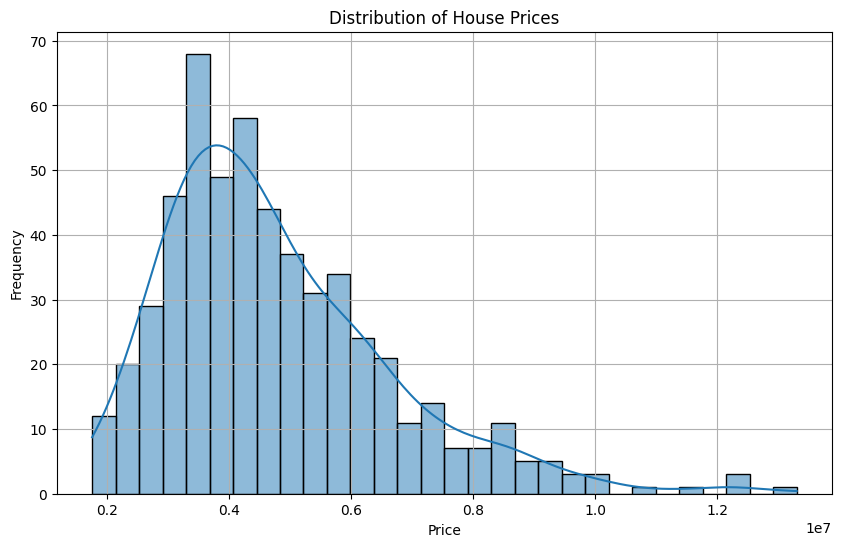

In [ ]:
# Visualizing the distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(housing['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The histogram of house prices shows a right-skewed distribution, indicating that most houses are priced lower, with fewer high-priced outliers. This suggests that we may need a robust regression techniques to handle the skewness when building our models.



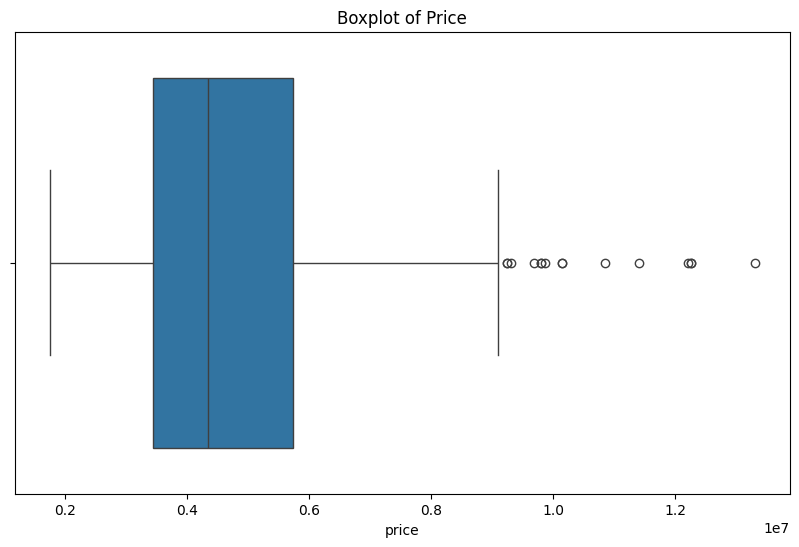

In [ ]:
#Boxplot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing, x='price')
plt.title("Boxplot of Price")
plt.show()

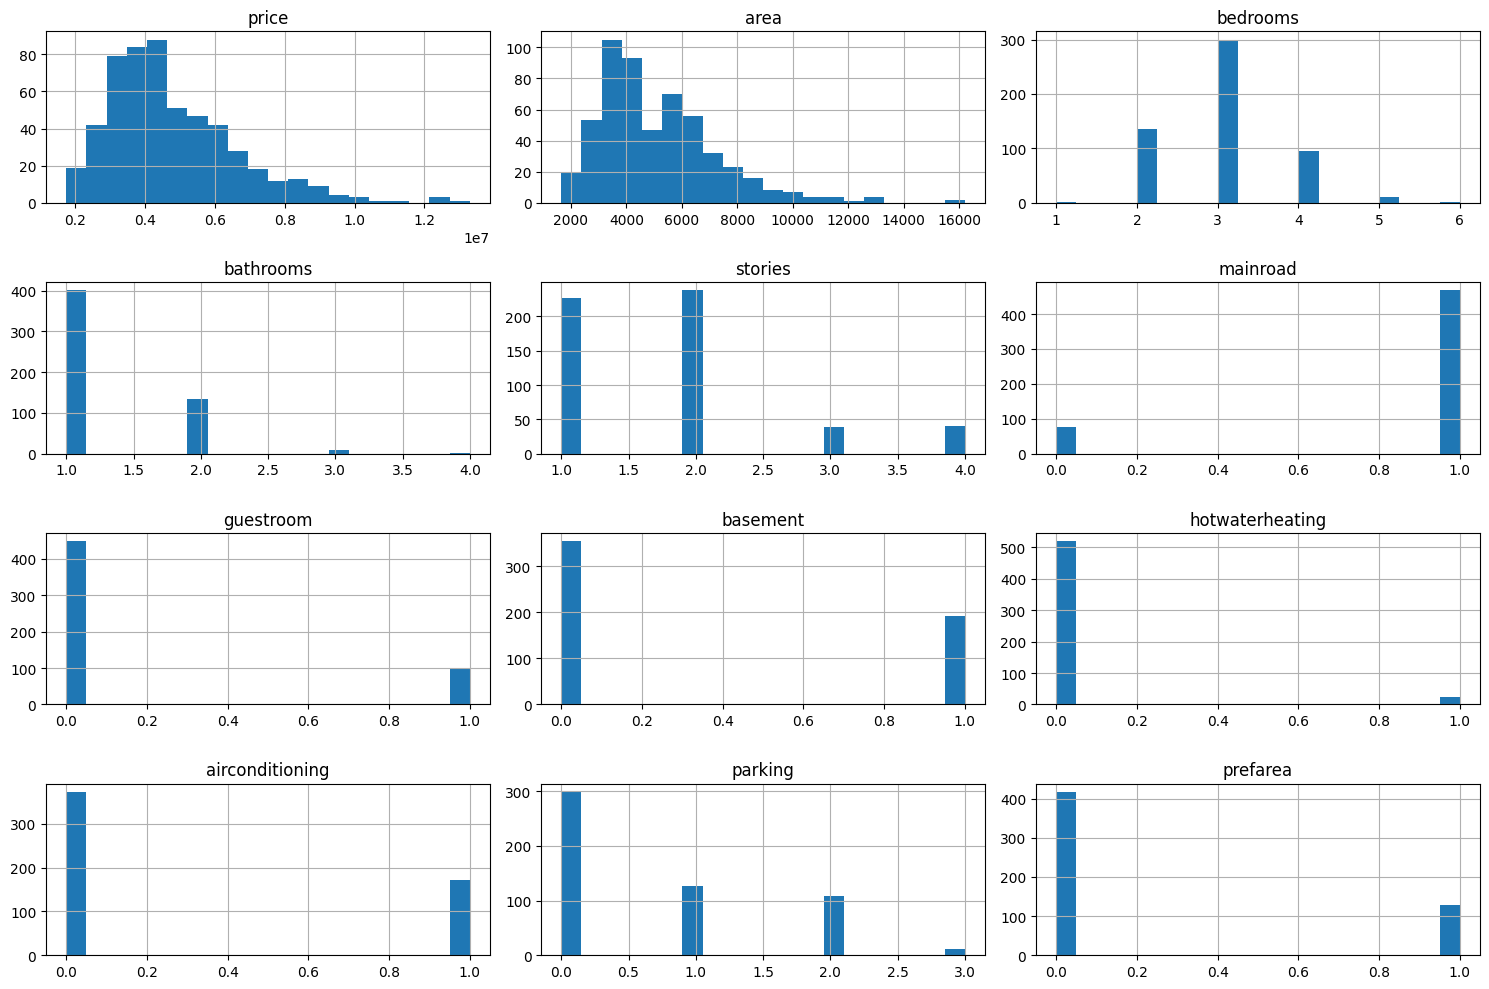

In [ ]:
# Visualize distributions of numerical columns
housing.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

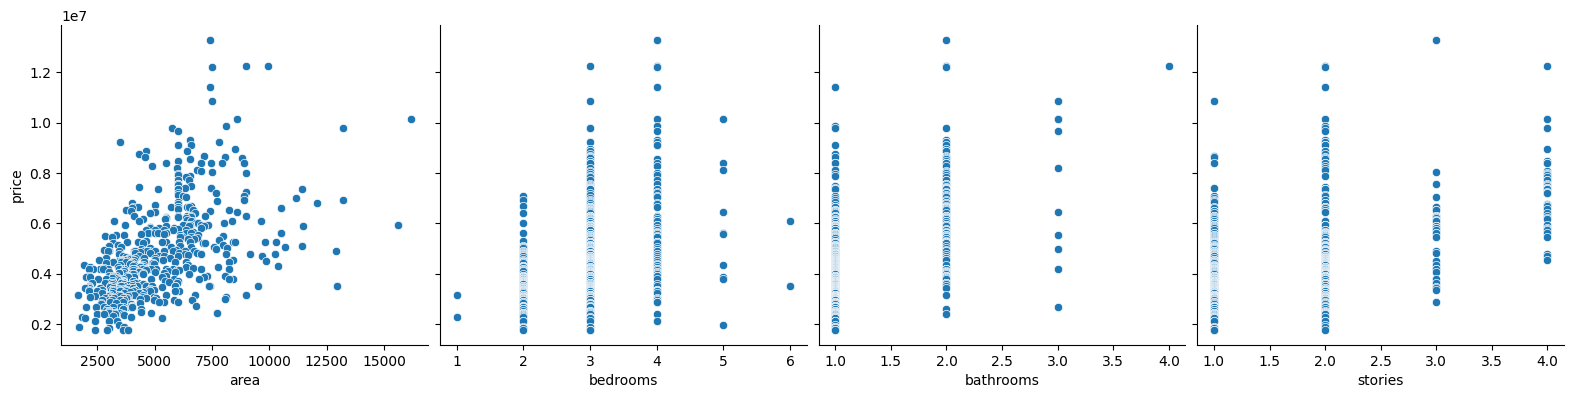

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(housing, x_vars=['area', 'bedrooms', 'bathrooms', 'stories'], y_vars='price', height=4)
plt.show()

In [ ]:
# Identifying categorical columns
categorical_cols = housing.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['furnishingstatus']

In [ ]:
# Applying one-hot encoding to the categorical columns
housing_encoded = pd.get_dummies(housing, columns=categorical_cols, drop_first=True)

# Displaying the first few rows of the encoded dataset to verify the transformation
housing_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


Next, I will explore the relationships between the features and the target variable (price) using correlation analysis and visualizations. This will help identify which features are most relevant for predicting house prices. I'll start by calculating the correlation matrix and visualizing it.

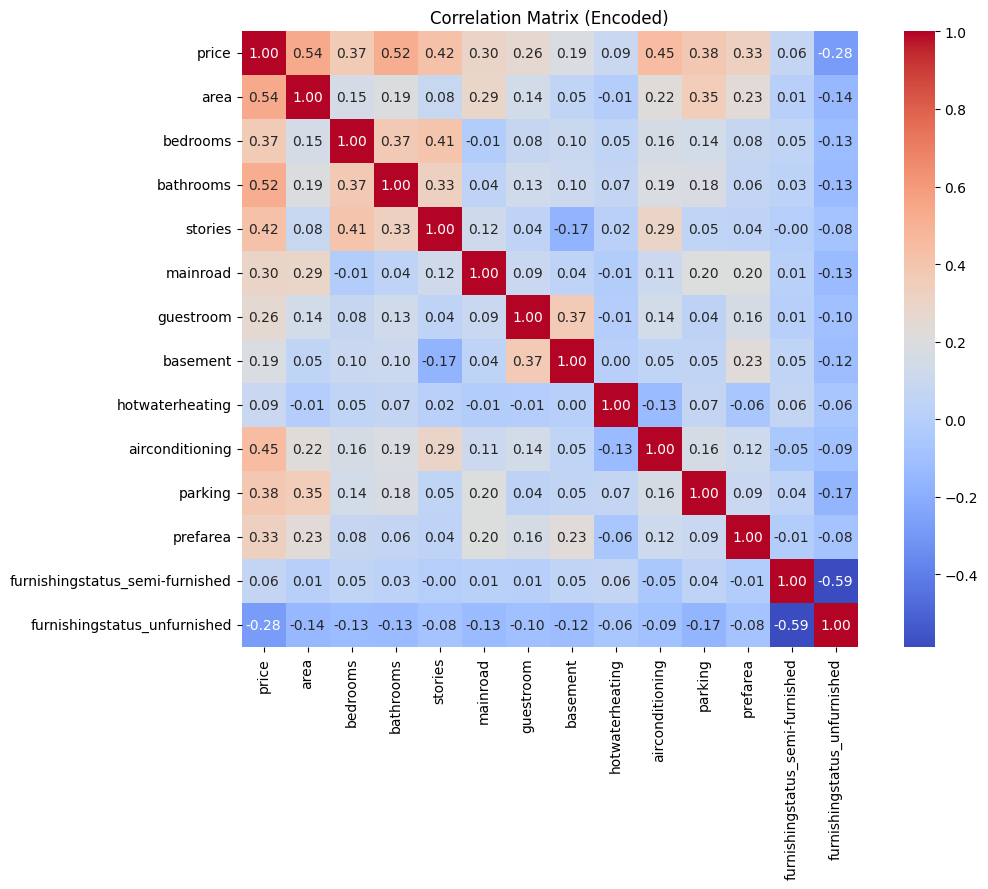

In [ ]:
#calculating the correlation matrix after one-hot encoding
correlation_matrix_encoded = housing_encoded.corr()

# Visualizing the updated correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Encoded)')
plt.show()

 The correlation matrix shows the relationships between the features and the target variable (price). Notably, features like area, bedrooms, and bathrooms have a strong positive correlation with price, indicating they are likely significant predictors for our regression models.

In [ ]:
# Splitting the data into training and testing sets for single feature regression (using 'area')
X_single = housing_encoded[['area']]
y_single = housing_encoded['price']
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

# Building the single feature linear regression model
model_single = LinearRegression()
model_single.fit(X_train_single, y_train_single)

# Making predictions
y_pred_single = model_single.predict(X_test_single)

# Evaluating the model
r2_single = r2_score(y_test_single, y_pred_single)
rmse_single = np.sqrt(mean_squared_error(y_test_single, y_pred_single))

# Displaying the evaluation metrics
r2_single, rmse_single

(0.27287851871974644, 1917103.7021424233)

The single feature linear regression model using area as the predictor has been built and evaluated. The R² score is approximately 0.273, indicating that about 27.3% of the variance in house prices can be explained by the area alone. The RMSE is approximately 1,917,104, which suggests a significant average error in predictions.

In [ ]:
# Splitting the data into training and testing sets for multiple feature regression
X_multiple = housing_encoded.drop('price', axis=1)
y_multiple = housing_encoded['price']
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# Building the multiple feature linear regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)

# Making predictions
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Evaluating the model
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y_test_multiple, y_pred_multiple))

# Displaying the evaluation metrics
r2_multiple, rmse_multiple

(0.6529242642153185, 1324506.9600914384)

The multiple linear regression model has been successfully built and evaluated. The R² score is approximately 0.653, indicating that about 65.3% of the variance in house prices can be explained by the combined features. The RMSE is approximately 1,324,507, which is an improvement over the single feature model.

This suggests that the multiple regression model is significantly better at predicting house prices compared to using just the area

In [ ]:
# Extracting the coefficients of the multiple linear regression model
coefficients = model_multiple.coef_
feature_names = X_multiple.columns

# Creating a DataFrame to display the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Displaying the coefficients DataFrame
coefficients_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
2,bathrooms,1.094445e+06
8,airconditioning,7.914267e+05
7,hotwaterheating,6.846499e+05
10,prefarea,6.298906e+05
3,stories,4.074766e+05
6,basement,3.902512e+05
4,mainroad,3.679199e+05
5,guestroom,2.316100e+05
9,parking,2.248419e+05
1,bedrooms,7.677870e+04


The coefficients of the multiple linear regression model indicate the impact of each feature on house prices. Positive coefficients suggest a direct relationship with the price, while negative coefficients indicate an inverse relationship.

From this analysis, we can see that features like bathrooms, airconditioning, and hotwaterheating have the most significant positive impact on house prices, while furnishingstatus_semi-furnished and furnishingstatus_unfurnished have negative impacts.